#M2 DSAI, GMMs

In [25]:
library(MASS)

We want to sample from a GMM using the latent variable formulation, for each $i \in \{1, \ldots, n\}$, we sample:
- $k_i \sim \text{Bern}( \pi )$
- $x_i \sim \mathcal{N}( \mu_{k_i},\Sigma_{k_i}) $,

where $\pi \in (0,1)$, $\mu_{0},\mu_{1} \in \mathbb{R}^D$, and $\Sigma_0, \Sigma_1 \in \mathcal{S}_D^{++}$, the set of positive definite matrices.

In [38]:
n = 100
D = 2

In [39]:
Pi = 0.7

In [40]:
mu_0 = c(2,2)
mu_1 = c(-2,-2)

In [41]:
S_0 = rbind(c(1,0.5),c(0.5,1))
S_1 = rbind(c(1,0),c(0,1))

To sample from a Bernoulli, we can sample from a binomial with $\texttt{size}=1$, this way:

In [42]:
rbinom(n = 1,size = 1, prob = Pi)

[1] 1

To sample from a mutivariate Gaussian, we can just use this function from the MASS package:

In [43]:
mvrnorm(n=1,mu_0,S_0)

[1] 2.526581 2.205626

Now, we have all the tools we need to sample from the GMM. Our final data matrix $X$ will be of size $n \times 2$.

In [44]:
X = matrix(nrow = n, ncol = 2) # creating an empty matrix

In [45]:
for (i in 1:n){
  k = rbinom(n = 1,size = 1, prob = Pi) # sample from a Bernoulli

  if (k==0){
    X[i,] = mvrnorm(n=1,mu_0,S_0)
  }

  if (k==1){
    X[i,] = mvrnorm(n=1,mu_1,S_1)
  }

}

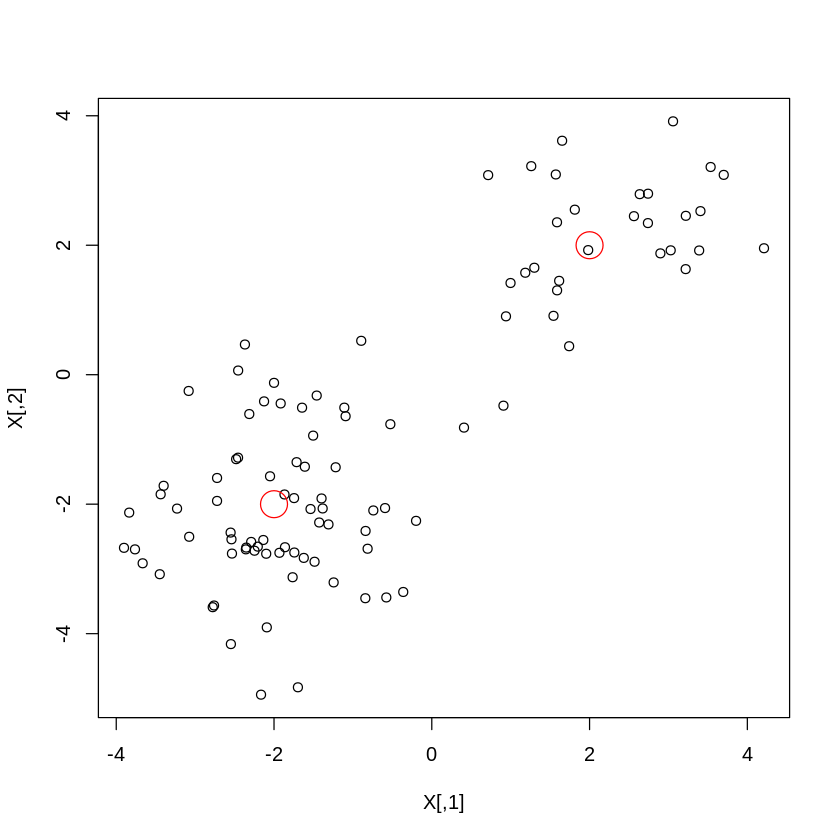

In [46]:
plot(X)
points(x=c(mu_0[1],mu_1[1]),y=c(mu_0[2],mu_1[2]), col = "red", cex=3)